In [2]:
import numpy as np
import pandas as pd
import sklearn.linear_model as skl_lm
import matplotlib.pyplot as plt

# To get nicer plots
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg') # Output as svg. Else you can try png
from IPython.core.pylabtools import figsize
figsize(10, 6) # Width and hight
np.set_printoptions(precision=3);

# 2.1 Problem 1.1 using matrix multiplications
Implement the linear regression problems from Exercises 1.1(a), (b), (c), (d) and (e) in Python using matrix multiplications.
A matrix
$$
\textbf{X} =  \begin{bmatrix}
    1 & 2 \\
    1 & 3 \\ 
\end{bmatrix}
$$
can be constructed with numpy as `X=np.array([[1, 2], [1, 3]])` (Make sure that `numpy` has been imported. Here it is imported as `np`). The commands for matrix multiplication and transpose in `numpy` are `@` or `np.matmul` and `.T` or `np.transpose()` respectively. A system of linear equations $\textbf{A}x=\textbf{b}$ can be solved using `np.linalg.solve(A,b)`.  A $k \times k$ unit matrix can be constructed with `np.eye(k)`.


## (a) <a id='2.1-a'></a>
Assume that you record a scalar input $x$ and a scalar output $y$. First, you record $x_1 = 2, y_1 = -1$, and thereafter $x_2 = 3, y_2 = 1$. Assume a linear regression model $y = \theta_0 + \theta_1 x + \epsilon$ and learn the parameters with maximum likelihood $\widehat{\boldsymbol{\theta}}$ with the assumption $\epsilon \sim \mathcal{N}(0,\sigma_\epsilon^2)$. Use the model to predict the output for the test input $x_\star = 4$, and plot the data and the model.

In [77]:
# Want to solve (X^T X)Theta = X^T y to obtain Theta

# Set up vectors / matrices
X = np.array([[1, 2], [1, 3]])
XT = np.transpose(X)
y = np.array([-1, 1])

# Do matrix multiplication of each side in X^T X Theta = X^T y
X_XT = np.matmul(XT, X)
XT_y = np.matmul(XT, y)

# Solve the equation system
theta_1 = np.linalg.solve(X_XT, XT_y)

# Predict for x = 4
x_new_1 = 4
pred_1 = np.matmul(np.array([1, x_new_1]), theta_1)

print(f"Theta: {theta_1}")
print(f"Prediction for x={x_new_1}: {pred_1}")

Theta: [-5.  2.]
Prediction for x=4: 2.9999999999999982


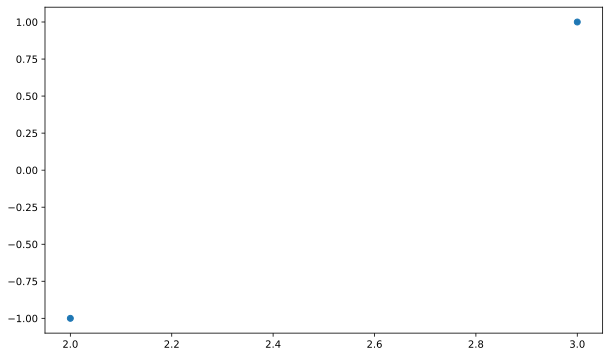

In [78]:
plt.scatter([2, 3], y)
line_data = [p]
plt.plot()
plt.show()

## (b) <a id='2.1-b'></a>

Now, assume you have made a third observation $y_3 = 2$ for $x_3 = 4$ (is that what you predicted in [(a)](#2.1-a)?). Update the parameters $\widehat{\boldsymbol{\theta}}$ to all 3 data samples, add the new model to the plot (together with the new data point) and find the prediction for $x_\star = 5$.

In [43]:
# Want to solve (X^T X)Theta = X^T y to obtain Theta

# Set up vectors / matrices
X = np.array([[1, 2], [1, 3], [1, 4]])
XT = np.transpose(X)
y = np.transpose(np.array([-1, 1, 2]))

# Do matrix multiplication of each side in X^T X Theta = X^T y
X_XT = np.matmul(XT, X)
XT_y = np.matmul(XT, y)

# Solve the equation system
theta_2 = np.linalg.solve(X_XT, XT_y)

# Predict for x = 5
x_new_2 = 5
pred_2 = np.matmul(np.array([1, x_new_2]), theta_2)

print(f"Theta: {theta_2}")
print(f"Prediction for x={x_new_2}: {pred_2}")

Theta: [-3.833  1.5  ]
Prediction for x=5: 3.6666666666666696


## (c) <a id='2.1-c'></a>
Repeat [(b)](#2.1-b), but this time using a model without intercept term, i.e., $y = \theta_1x + \epsilon$.

In [63]:
# Want to solve (X^T X)Theta = X^T y to obtain Theta

# Set up vectors / matrices
X = np.array([[2], [3], [4]])
XT = np.transpose(X)
y = np.transpose(np.array([-1, 1, 2]))

# Do matrix multiplication of each side in X^T X Theta = X^T y
X_XT = np.matmul(XT, X)
XT_y = np.matmul(XT, y)

# Solve the equation system
theta_3 = np.linalg.solve(X_XT, XT_y)

# Predict for x = 5
x_new_2 = 5
pred_3 = np.matmul(np.array([x_new_2]), theta_3)

print(f"Theta: {theta_3}")
print(f"Prediction for x={x_new_2}: {pred_3}")

Theta: [0.31]
Prediction for x=5: 1.5517241379310345


## (d) <a id='2.1-d'></a>
Repeat [(b)](#2.1-b), but this time using Ridge Regression with $\gamma=1$ instead.

In [35]:
# With ridge regression, should solve (X^T X + lambda * I)Theta = X^T y to obtain Theta

# Set up vectors / matrices - exclude intercept term 1
X = np.array([[1, 2], [1, 3], [1, 4]])
XT = np.transpose(X)
y = np.transpose(np.array([-1, 1, 2]))
lambda_I = np.eye(2)

# Do matrix multiplication of each side in X^T X Theta = X^T y
X_XT = np.matmul(XT, X)
XT_y = np.matmul(XT, y)

# Add lambda * I to left hand side
X_XT = X_XT + lambda_I

# Solve the equation system
theta_4 = np.linalg.solve(X_XT, XT_y)

print(f"Theta: {theta_4}")

Theta: [-0.538  0.462]


## (e) <a id='(e)'></a>
You realize that there are actually _two_ output variables in the problem you are studying. In total, you have made the following observations:

| sample | input $x$ | first output $y_1$ | second output $y_2$ |
|:------:|:---------:|:------------------:|:-------------------:|
| (1)    | 2         | -1                 | 0                   |
| (2)    | 3         | 1                  | 2                   |
| (3)    | 4         | 2                  | -1                  |

You want to model this as a linear regression with multidimensional outputs (without regularization), i.e.,
$$\begin{align}
    y_1 &= \theta_{01}+\theta_{11}x + \epsilon_1\\
    y_2 &= \theta_{02}+\theta_{12}x + \epsilon_2
\end{align}$$
By introducing, for the general case of $p$ inputs and $q$ outputs, the matrices
$$\begin{align}
    \underbrace{\begin{bmatrix}
        y_{11} & \cdots & y_{1q} \\
        y_{21} & \cdots & y_{2q} \\
        \vdots & & \vdots \\
        y_{n1} & \cdots & y_{nq}
    \end{bmatrix}}_{\boldsymbol{\mathrm{Y}}}
    &=
    \underbrace{\begin{bmatrix}
        1 & x_{11} & x_{12} & \cdots & x_{1p} \\
        1 & x_{21} & x_{22} & \cdots & x_{2p} \\
        \vdots     & \vdots & \vdots & \vdots \\
        1 & x_{n1} & x_{n2} & \cdots & x_{np} \\
    \end{bmatrix}}_{\boldsymbol{\mathrm{X}}}
    \underbrace{\begin{bmatrix}
        \theta_{01} & \theta_{02} & \cdots & \theta_{0q} \\
        \theta_{11} & \theta_{12} & \cdots & \theta_{1q} \\
        \theta_{21} & \theta_{22} & \cdots & \theta_{2q} \\
        \vdots      & \vdots      &        & \vdots      \\
        \theta_{p1} & \theta_{p2} & \cdots & \theta_{pq}
    \end{bmatrix}}_{\boldsymbol{\mathrm{\Theta}}} + \boldsymbol{\epsilon}
\end{align}$$

try to make an educated guess how the normal equations can be generalized to the multidemsional output case. (A more thorough derivation is found in problem 1.5). Use your findings to compute the least square solution $\widehat{\boldsymbol{\mathrm{\Theta}}}$ to the problem now including both the first output $y_1$ and the second output $y_2$.

In [37]:
# Want to solve (X^T X)Theta = X^T y to obtain Theta

# Set up vectors / matrices
X = np.array([[1, 2], [1, 3], [1, 4]])
XT = np.transpose(X)
y = np.array([[-1, 0], [1, 2], [2, -1]])

# Do matrix multiplication of each side in X^T X Theta = X^T y
X_XT = np.matmul(XT, X)
XT_y = np.matmul(XT, y)

# Solve the equation system
theta_5 = np.linalg.solve(X_XT, XT_y)

print(f"Theta y_1: {theta_5[0]}")
print(f"Theta y_2: {theta_5[1]}")

Theta y_1: [-3.833  1.833]
Theta y_2: [ 1.5 -0.5]


# 2.2 Problem 1.1 using the linear_model.LinearRegression() command
Implement the linear regression problem from Exercises 1.1(b) and (c) using the command `LinearRegression()` from `sklearn.linear_model`. 

## (b)

[See above.](#2.1-b)

In [60]:
# Set up input arrays

x = np.array([2, 3, 4]).reshape(3, 1)
y = np.array([-1, 1, 2])

# Fit linear regression model
model = skl_lm.LinearRegression()
model.fit(x, y)

# Make prediction for new observation
x_new = 5
x_input = np.array([x_new]).reshape(1, 1)
pred_1 = model.predict(x_input)
pred_1

array([3.667])

## (c)
[See above.](#2.1-c)

In [59]:
# Fit linear regression model without intercept
model = skl_lm.LinearRegression(fit_intercept=False)
model.fit(x, y)

# Make prediction for new observation
x_new = 5
x_input = np.array([x_new]).reshape(1, 1)
pred_2 = model.predict(x_input)
pred_2

array([1.552])

# 2.3 The Auto data set

## (a)
Load the dataset `'data/auto.csv'`. Familiarize yourself with the dataset using `auto.info()`. The dataset:  

**Description**:  Gas mileage, horsepower, and other information for 392 vehicles.  
**Format**: A data frame with 392 observations on the following 9 variables.  

- `mpg`: miles per gallon  
- `cylinders`: Number of cylinders between 4 and 8
- `displacement`: Engine displacement (cu. inches)
- `horsepower`: Engine horsepower
- `weight`: Vehicle weight (lbs.)
- `acceleration`: Time to accelerate from 0 to 60 mph (sec.)
- `year`: Model year (modulo 100)
- `origin`: Origin of car (1. American, 2. European, 3. Japanese)
- `name`: Vehicle name  
*The orginal data contained 408 observations but 16 observations with missing values were removed.*


In [67]:
# Load library
# The null values are '?' in the dataset. `na_values="?"` recognize the null values. 
# There are null values that will mess up the computation. Easier to drop them by `dropna()`.

# url = 'data/auto.csv'
url = 'https://uu-sml.github.io/course-sml-public/data/auto.csv'

df_auto = pd.read_csv(url, na_values='?').dropna()

In [68]:
df_auto.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


## (b)
Divide the data set randomly into two approximately equally sized subsets, `train` and `test` by generating the random indices using `np.random.choice()`.


In [79]:
train_index = np.random.choice(df_auto.shape[0], replace=False, size=int(df_auto.shape[0] / 2))
train_data = df_auto.iloc[train_index]
test_data = df_auto.iloc[~train_index]

In [85]:
train_data.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
335,35.0,4,122.0,88.0,2500,15.1,80,2,triumph tr7 coupe
284,20.6,6,225.0,110.0,3360,16.6,79,1,dodge aspen 6
59,23.0,4,97.0,54.0,2254,23.5,72,2,volkswagen type 3
42,12.0,8,383.0,180.0,4955,11.5,71,1,dodge monaco (sw)
45,18.0,6,258.0,110.0,2962,13.5,71,1,amc hornet sportabout (sw)


In [86]:
test_data.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
60,20.0,4,140.0,90.0,2408,19.5,72,1,chevrolet vega
110,22.0,4,108.0,94.0,2379,16.5,73,3,datsun 610
337,32.4,4,107.0,72.0,2290,17.0,80,3,honda accord
355,33.7,4,107.0,75.0,2210,14.4,81,3,honda prelude
351,34.4,4,98.0,65.0,2045,16.2,81,1,ford escort 4w


## (c)
Perform linear regression with `mpg` as the output and all other variables except name as input. How well (in terms of root-mean-square-error) does the model perform on test data and training data, respectively?


## (d)
Now, consider the input variable `origin`. What do the different numbers represent? By running `auto.origin.sample(30)` we see the 30 samples of the variable and that the input variables is quantitative. Does it really makes sense to treat it as a quantitative input? Use `pd.get_dummies()` to split it into dummy variables and do the linear regression again.


## (e)
Try obtain a better RMSE on test data by removing some inputs (explore what happens if you remove, e.g, `year`, `weight` and `acceleration`)

## (f)
Try to obtain a better RMSE on test data by adding some transformations of inputs, such as 
$log(x)$, $\sqrt{x}$, $x_1x_2$ etc.


# 2.4 Nonlinear transformations of input variables

In [ ]:
#Start by running the following code to generate your training data
np.random.seed(1)
x_train = np.random.uniform(0, 10, 100)
y_train = .4 \
          - .6 * x_train \
          + 3. * np.sin(x_train - 1.2) \
          + np.random.normal(0, 0.1, 100)

## (a) 
Plot the training output `y_train` versus the training input `x_train`.  

## (b) 
Learn a model on the form 
$$
y= a + bx + c \sin(x + \phi) + \epsilon,  \qquad  \epsilon \sim \mathcal{N}(0, 0,1^2) \qquad (2.1)
$$

where all parameters $a$, $b$, $c$ and $\phi$ are to be learned from the training data `x_train` and `y_train`. Refrain from using the` linear_model()` command, but implement the normal equations yourself as in problem 2.1. Hint: Even though (2.1) is not a linear regression model, you can use the fact that $c \sin(x + \phi) = c \cos(\phi) \sin(x) + c \sin(\phi) \cos(x)$ to transform it into one.  


## (c) 
Construct 100 test inputs `x_test` in the span from 0 to 10 by using the `np.linspace()` function. Predict the outputs corresponding to these inputs and plot them together with the training data.

## (d) 
Do a least squares fit by instead using the `linear_model()` function in `Python`. Check that you get the same estimates as in (b).

# 2.5  Regularization

In this exercise we will apply Ridge regression and Lasso for fitting a polynomial to a scalar data set. We will have a setting where we first generate synthetic training data from 
<a id=2.2></a>$$
y = x^3 + 2x^2 + 6 + \epsilon, \qquad (2.2)
$$
and later try to learn model for the data.   

## (a) <a id='2.5-a'></a>
Write a function that implements the polynomial [(2.2)](#2.2), i.e., takes $x$ as argument and returns $x^3 + 2x^2 + 6$. 

## (b) 
Use `np.random.seed()` to set the random seed. Use the function `np.linspace()` to construct a vector `x` with `n = 12` elements equally spaced from $-2.3$ to $1$. Then use your function from [(a)](#2.5-a) to construct a vector $\textbf{y} = [y_1, ..., y_n]^T$ with 12 elements, where $y = x^3 + 2x^2 + 6 + \epsilon$, with $\epsilon \sim  \mathcal{N(0, 1^2)}$. This is our training data.

## (c) 
Plot the training data $\mathcal{T} = \{x_i, y_i\}_{i=1}^{12}$ together with the "true" function.

## (d)
Fit a straight line to the data with $y$ as output and $x$ as input and plot the predicted output $\hat{y}_{\star}$ for densely spaced $x_{\star}$ values between $-2.3$ and $1$. Plot these predictions in the same plot window.

## (e) 
Fit an 11th degree polynomial to the data with linear regression. Plot the corresponding predictions.

## (f) 

Use the fucntion `sklearn.linear_model.Ridge` and `sklearn.linear_model.Lasso` to fit a 11th degree polynomial. Also inspect the estimated coefficients. Try different values of penalty term $\alpha$. What do you observe?
